### MATRIZ DE CORRELACION

C:\Users\USUARIO WINDOWS\AppData\Local\Temp\ipykernel_12936\3202409363.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = df.corr(method='pearson')


Matriz de correlación de Pearson:
             WIND       IND      RAIN     IND.1     T.MAX     IND.2     T.MIN  \
WIND     1.000000 -0.038578  0.120876  0.070512 -0.242559  0.047860 -0.093014   
IND     -0.038578  1.000000 -0.148535 -0.028176 -0.075365 -0.015173 -0.050447   
RAIN     0.120876 -0.148535  1.000000  0.023944 -0.044248  0.012567  0.011067   
IND.1    0.070512 -0.028176  0.023944  1.000000 -0.036045  0.909739 -0.033344   
T.MAX   -0.242559 -0.075365 -0.044248 -0.036045  1.000000 -0.247060  0.789980   
IND.2    0.047860 -0.015173  0.012567  0.909739 -0.247060  1.000000 -0.535746   
T.MIN   -0.093014 -0.050447  0.011067 -0.033344  0.789980 -0.535746  1.000000   
T.MIN.G  0.012823 -0.064185  0.027365 -0.004040  0.679804 -0.129421  0.906869   

          T.MIN.G  
WIND     0.012823  
IND     -0.064185  
RAIN     0.027365  
IND.1   -0.004040  
T.MAX    0.679804  
IND.2   -0.129421  
T.MIN    0.906869  
T.MIN.G  1.000000  


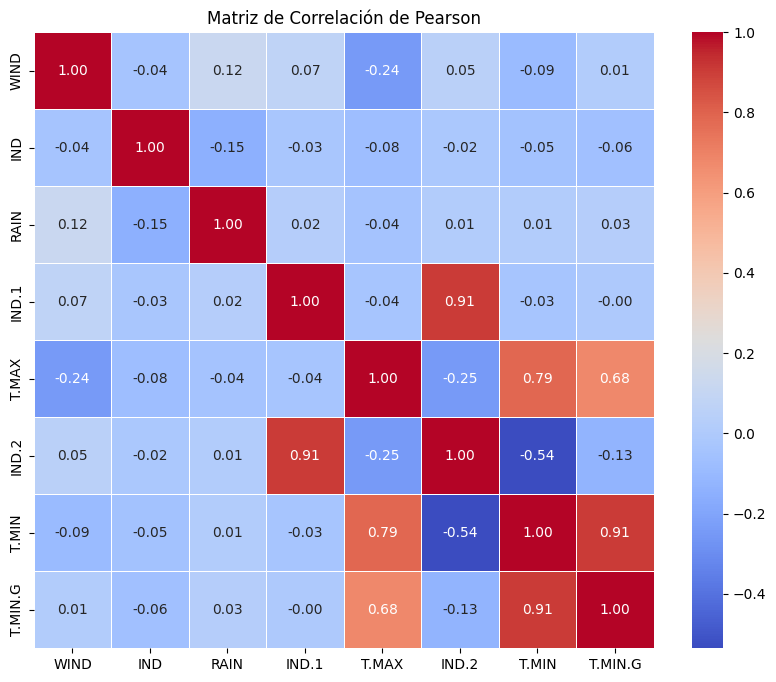

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Calcular la matriz de correlación de Pearson
matriz_correlacion = df.corr(method='pearson')

# Mostrar la matriz de correlación
print("Matriz de correlación de Pearson:")
print(matriz_correlacion)

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Pearson')
plt.show()

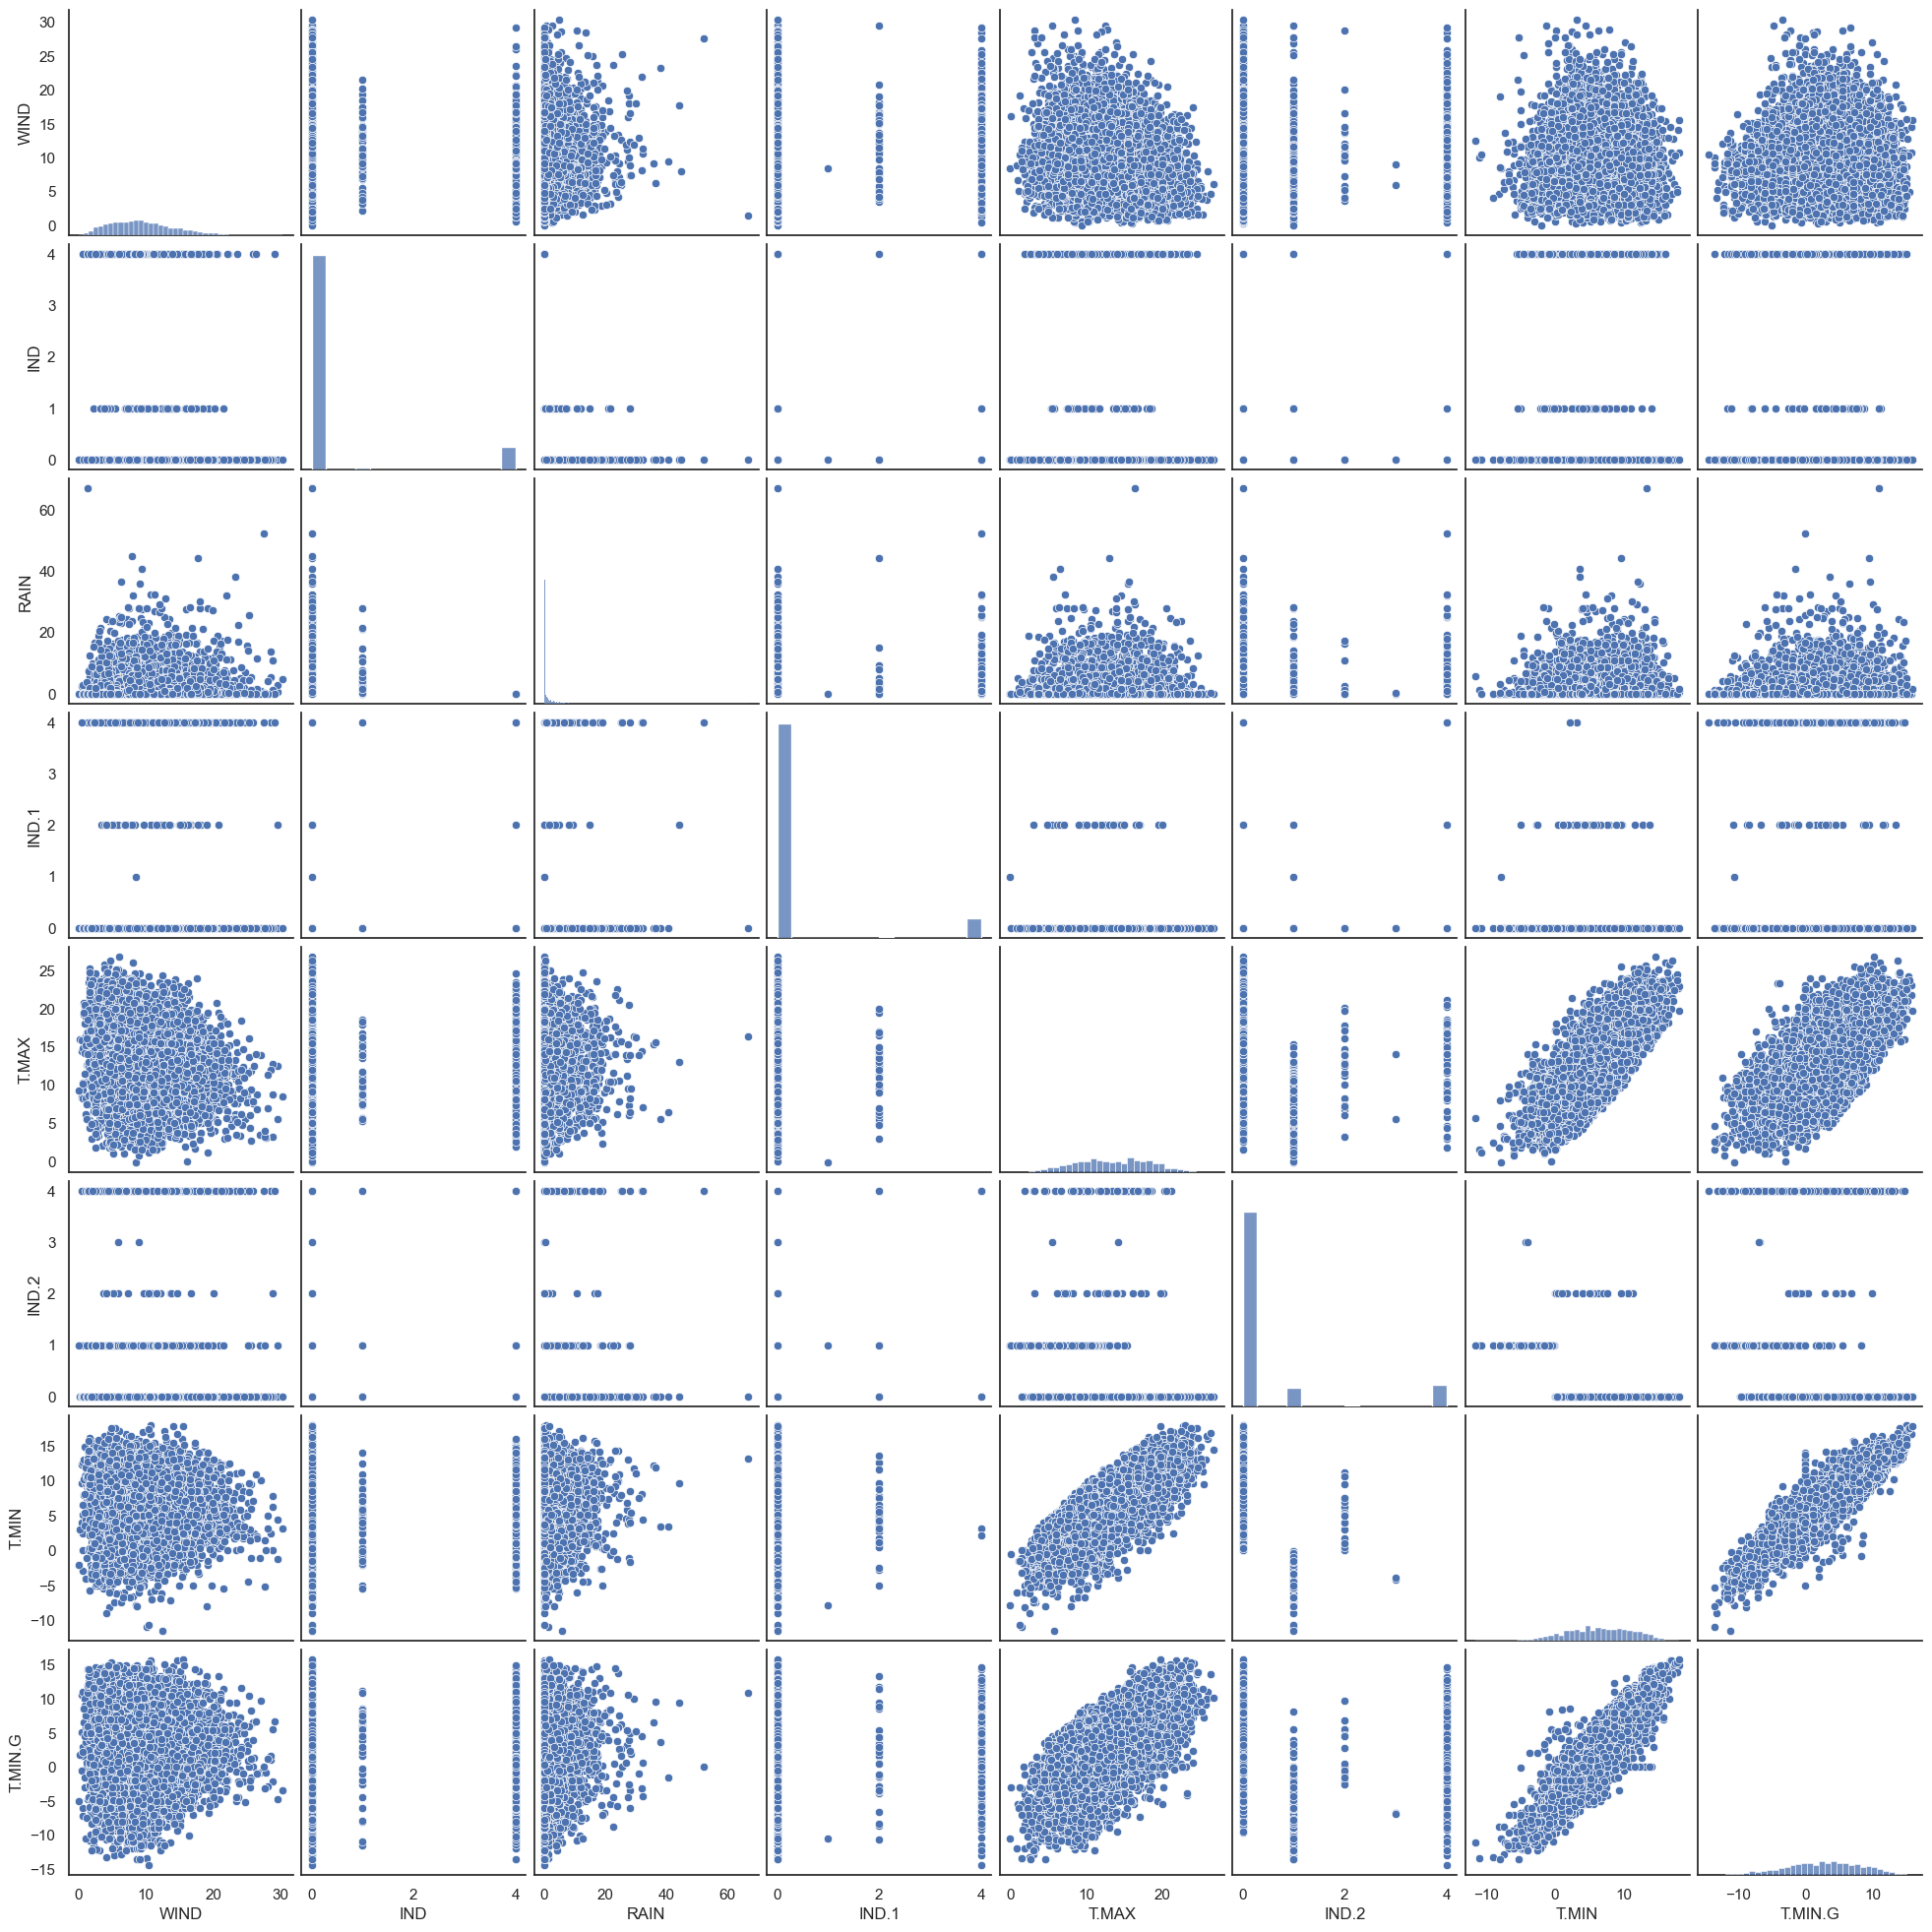

In [15]:
sns.pairplot(df)

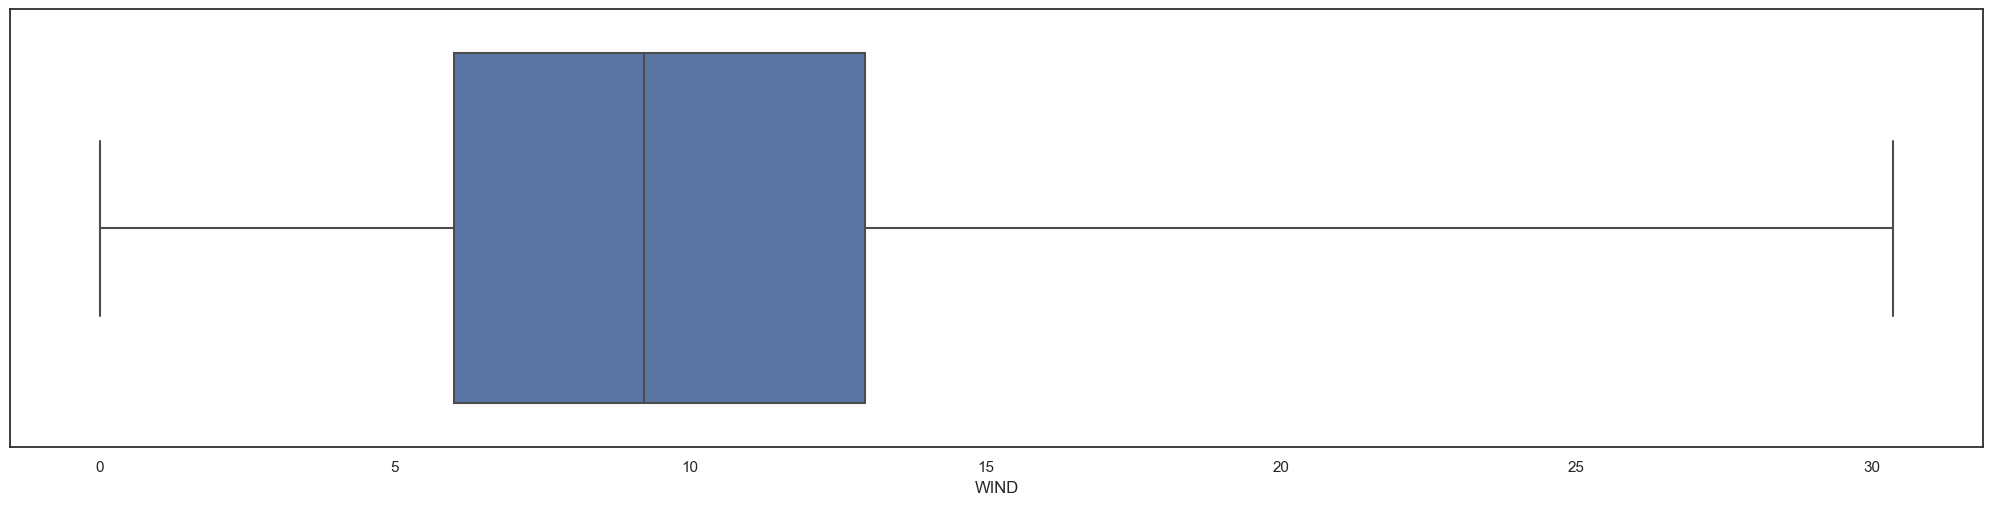

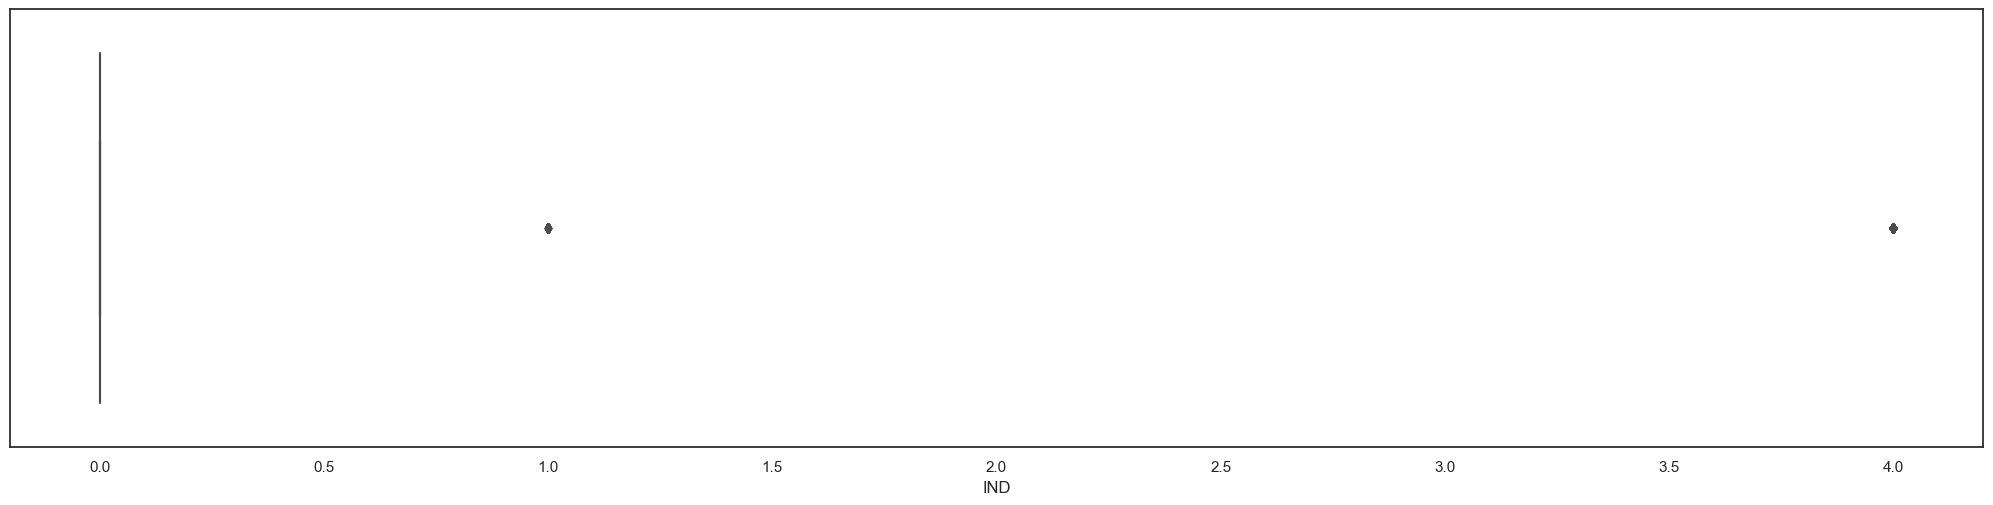

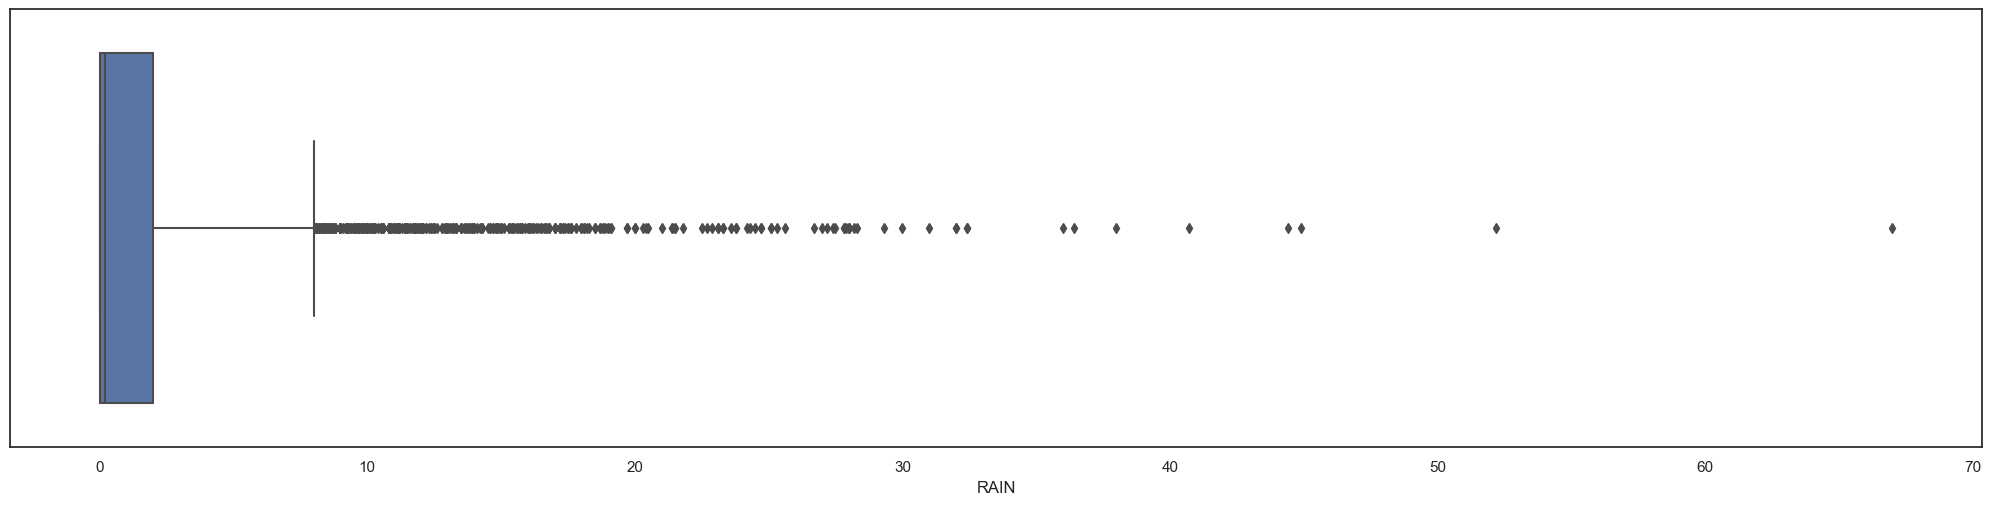

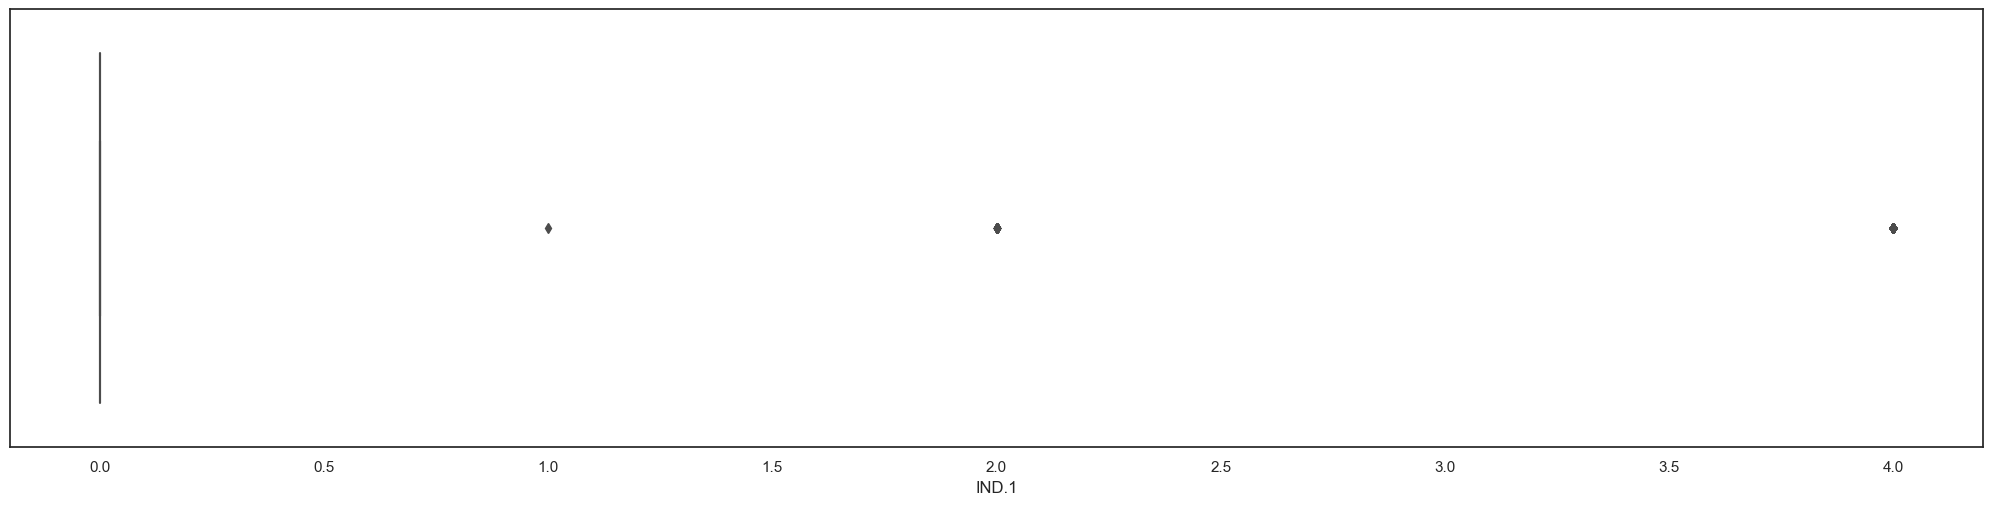

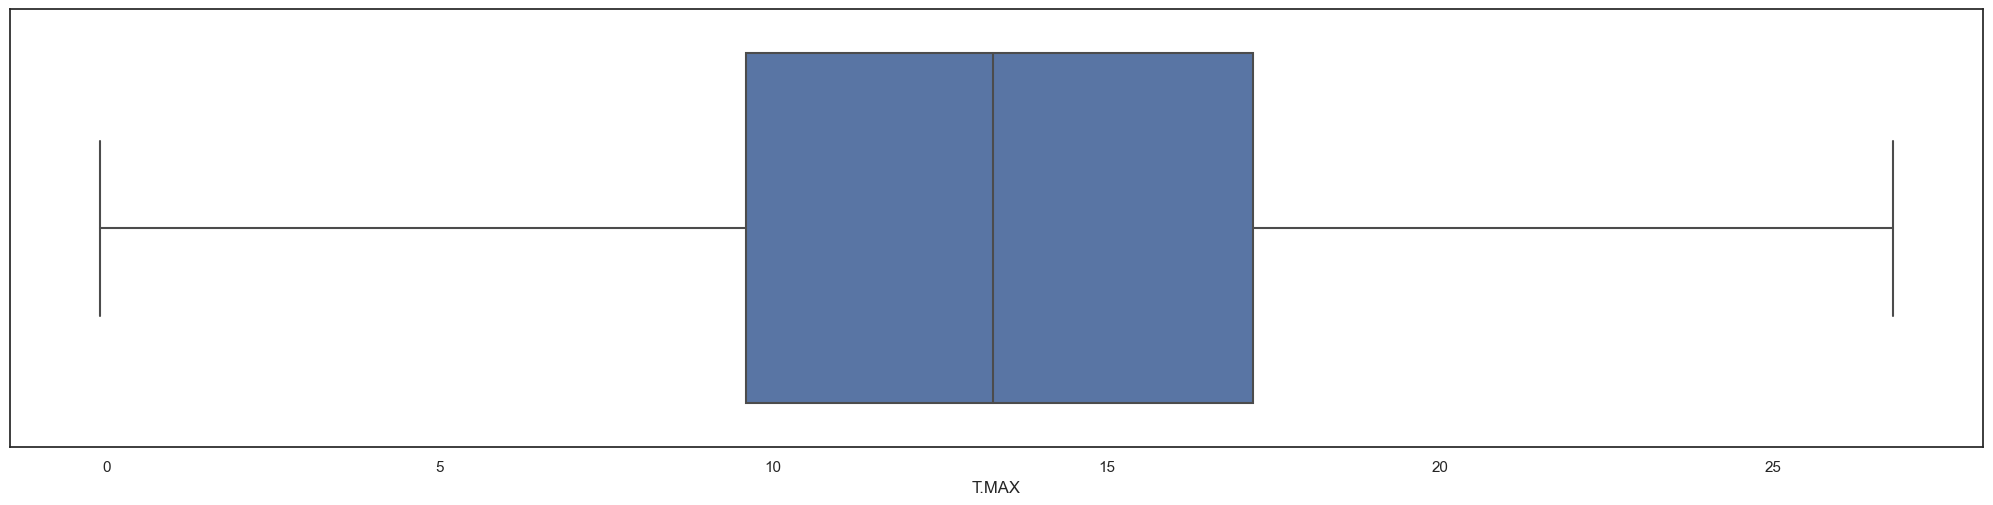

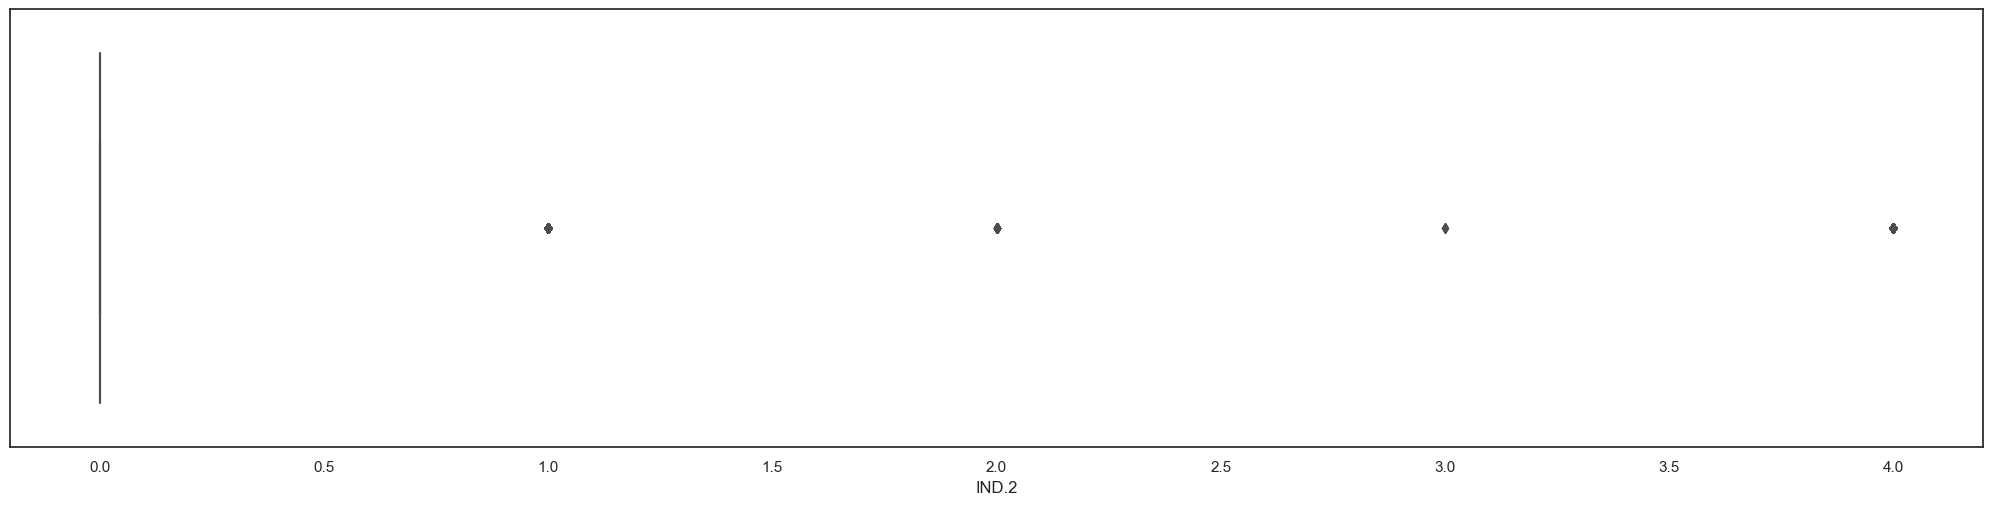

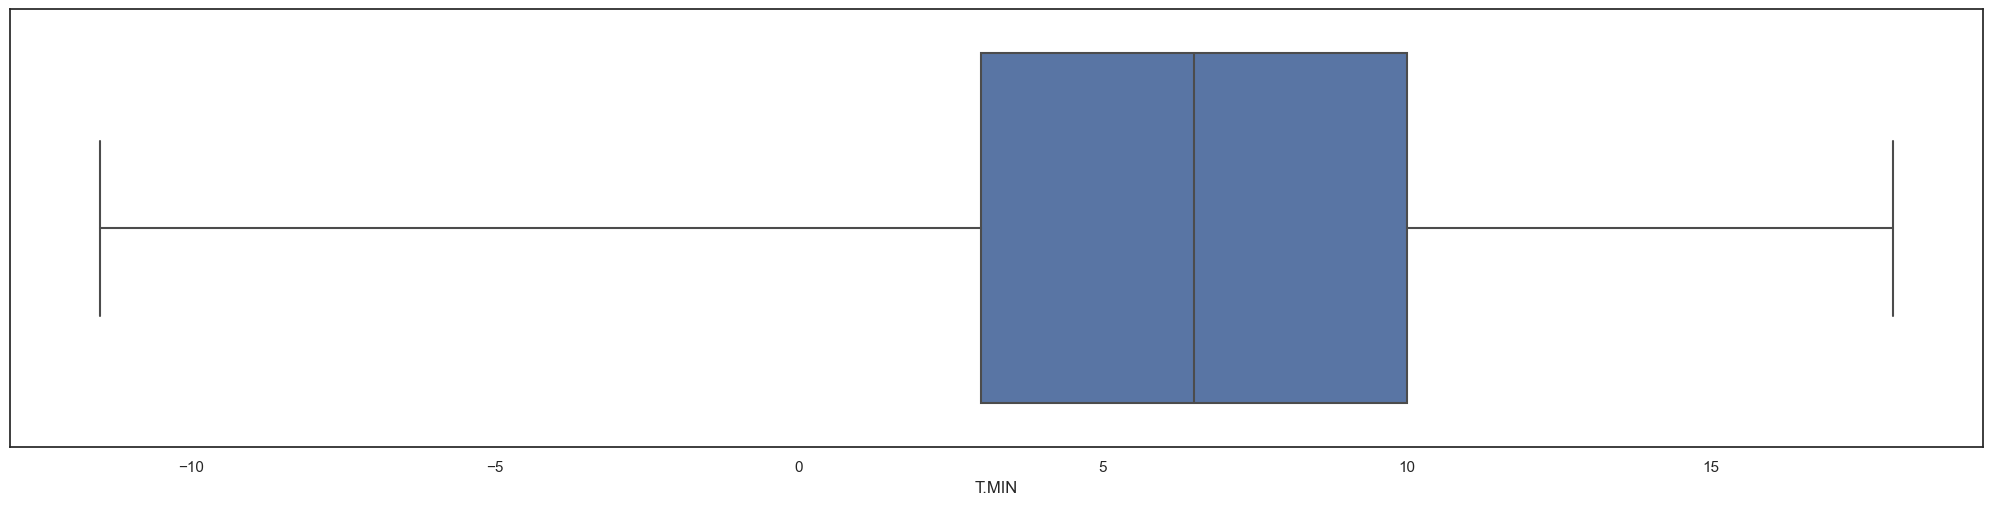

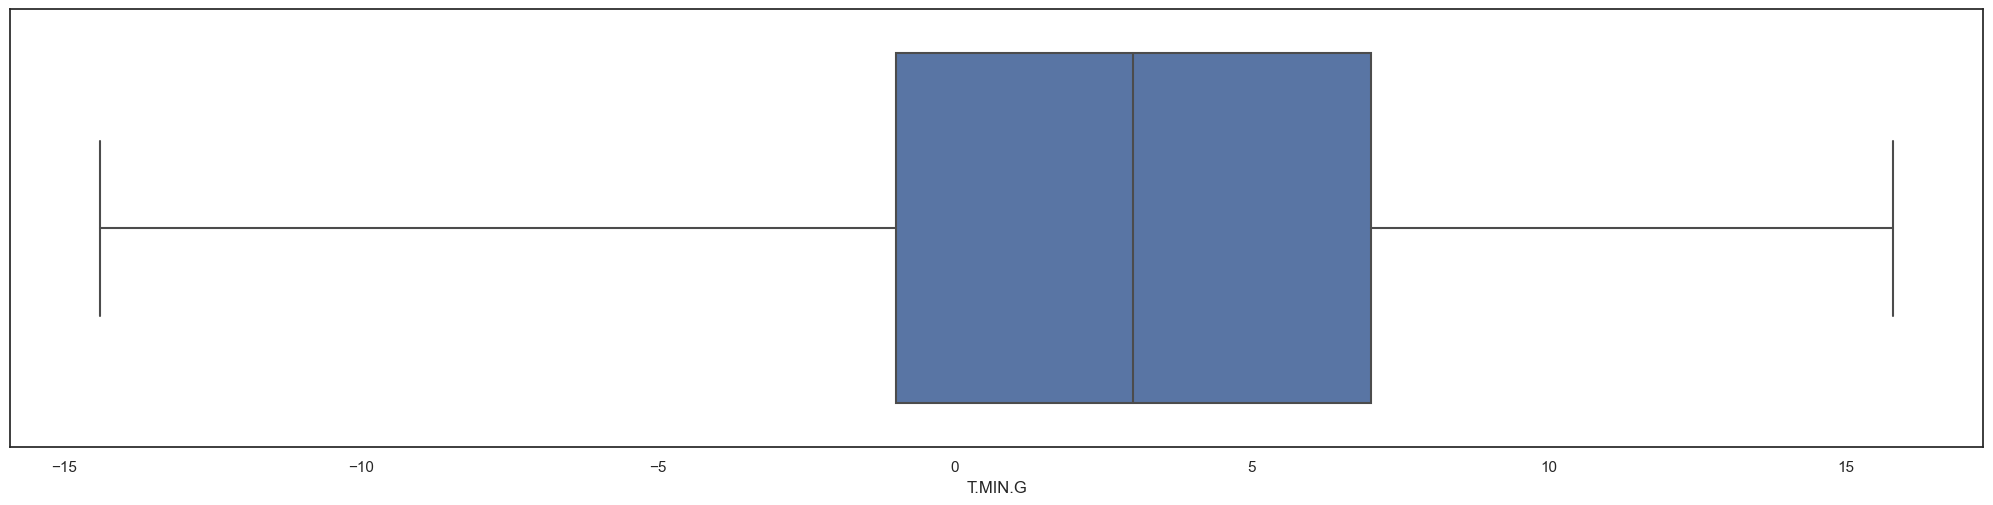

In [16]:
Numeric=df.drop('DATE',axis=1)
index=0
for feature in Numeric.columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(Numeric.columns)),2,index)
    sns.boxplot(x=feature,data=Numeric,whis=3)

    plt.tight_layout()

    plt.show()

In [17]:
#finding outliers.
def find_outliers_iqr(df):
    Q1 = df.quantile(0.25)  
    Q3 = df.quantile(0.75)  
    IQR = Q3 - Q1
    is_outlier = (df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))
    outlier_count = is_outlier.sum()
    return is_outlier,outlier_count

is_outlier,outlier_count = find_outliers_iqr(Numeric)
print(outlier_count)

WIND         66
IND         681
RAIN        740
IND.1       601
T.MAX         0
IND.2      1161
T.MIN         8
T.MIN.G       5
dtype: int64


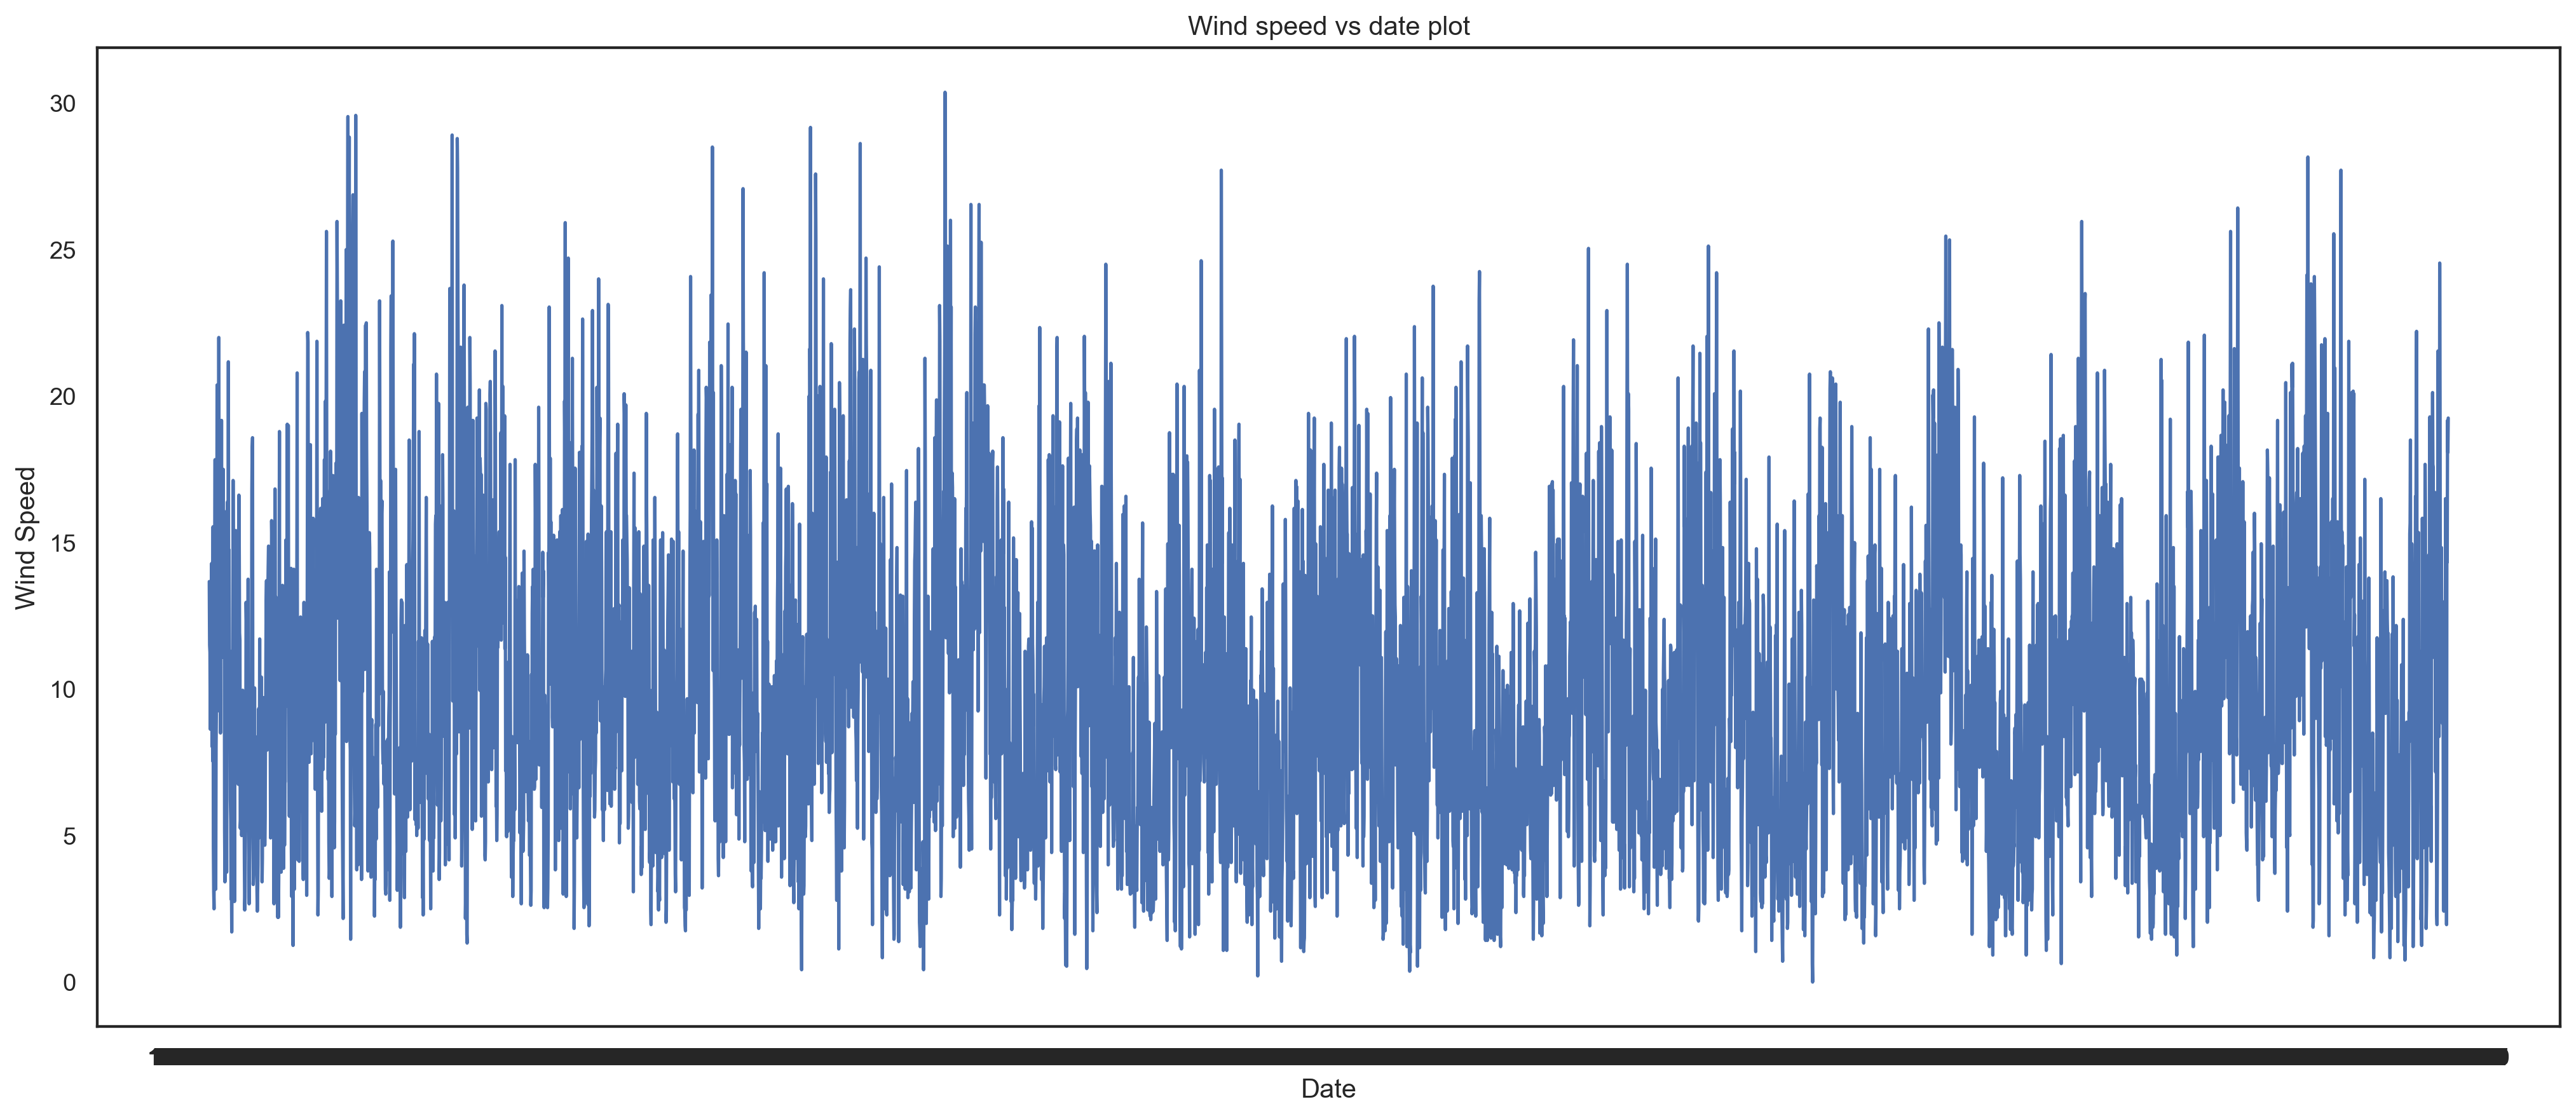

In [18]:
plt.figure(figsize=(20,8),dpi=250)
plt.plot(df['DATE'],df['WIND'])
plt.title('Wind speed vs date plot')
plt.xlabel('Date')
plt.ylabel('Wind Speed')
plt.show()

### T MIN G - T MIN CORRELACION 0.91

Correlación de Pearson entre T.MIN y T.MIN.G: 0.91


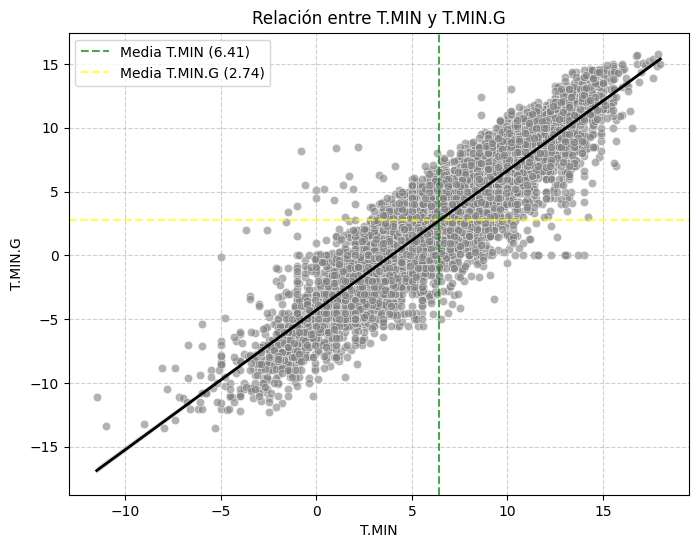

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MIN.G"]
data = df[columnas_interes]

# Calcular la correlación de Pearson entre T.MIN y T.MIN.G
correlacion = data.corr(method='pearson').iloc[0, 1]
print(f"Correlación de Pearson entre T.MIN y T.MIN.G: {correlacion:.2f}")

# Calcular las medias de T.MIN y T.MIN.G
media_tmin = data["T.MIN"].mean()
media_tmin_g = data["T.MIN.G"].mean()

# Configurar el gráfico
plt.figure(figsize=(8, 6))

# Dibujar scatter plot en gris claro
sns.scatterplot(x="T.MIN", y="T.MIN.G", data=data, color='gray', alpha=0.6)

# Dibujar líneas punteadas indicando los valores medios
plt.axvline(x=media_tmin, color='green', linestyle='--', alpha=0.7, label=f'Media T.MIN ({media_tmin:.2f})')
plt.axhline(y=media_tmin_g, color='yellow', linestyle='--', alpha=0.7, label=f'Media T.MIN.G ({media_tmin_g:.2f})')

# Dibujar línea de tendencia
sns.regplot(x="T.MIN", y="T.MIN.G", data=data, scatter=False, color='black', line_kws={'linestyle': '-', 'linewidth': 2})

# Etiquetas y título
plt.title('Relación entre T.MIN y T.MIN.G')
plt.xlabel('T.MIN')
plt.ylabel('T.MIN.G')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()




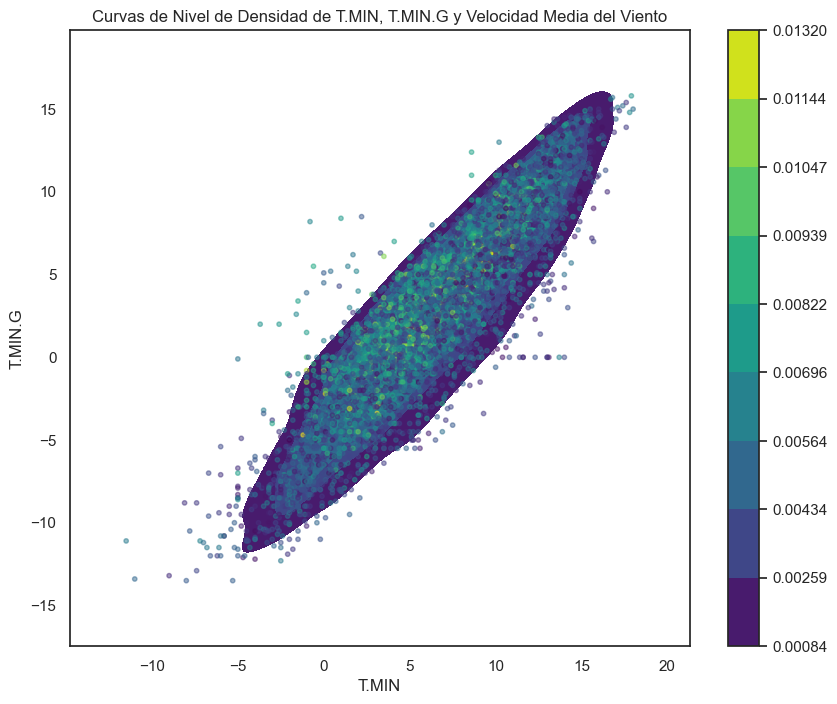

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MIN.G", "WIND"]
data = df[columnas_interes]

# Crear una figura para el gráfico de curvas de nivel de densidad
plt.figure(figsize=(10, 8))

# Crear el gráfico de curvas de nivel de densidad con velocidad media del viento
sns.kdeplot(data=data, x="T.MIN", y="T.MIN.G", cmap="viridis", fill=True, thresh=0.05, levels=10, cbar=True)

# Añadir etiquetas y título
plt.title('Curvas de Nivel de Densidad de T.MIN, T.MIN.G y Velocidad Media del Viento')
plt.xlabel('T.MIN')
plt.ylabel('T.MIN.G')

# Añadir la barra de color de la velocidad media del viento (WIND)
plt.scatter(data['T.MIN'], data['T.MIN.G'], c=data['WIND'], cmap="viridis", s=10, alpha=0.5)  # Añado los puntos con color representando 'WIND'

# Mostrar la figura
plt.show()



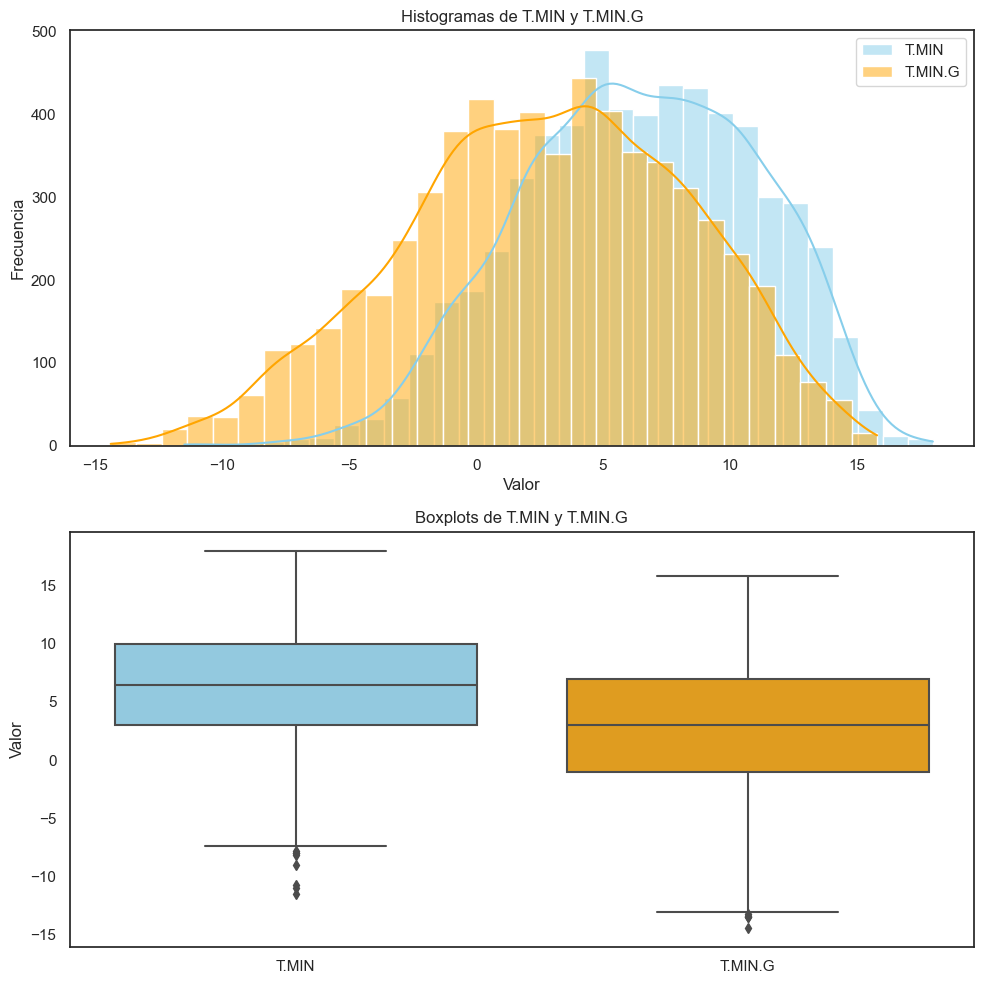

Estadísticas descriptivas de T.MIN:
count    5900.000000
mean        6.411678
std         4.637243
min       -11.500000
25%         3.000000
50%         6.500000
75%        10.000000
max        18.000000
Name: T.MIN, dtype: float64

Estadísticas descriptivas de T.MIN.G:
count    6214.000000
mean        2.736547
std         5.569175
min       -14.400000
25%        -1.000000
50%         3.000000
75%         7.000000
max        15.800000
Name: T.MIN.G, dtype: float64


In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MIN.G"]
data = df[columnas_interes]

# Crear una figura con dos subplots (uno para histogramas y otro para boxplots)
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # 2 filas, 1 columna

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Histogramas (en el primer subplot)
sns.histplot(data["T.MIN"], bins=30, color='skyblue', kde=True, ax=axes[0], label='T.MIN')
sns.histplot(data["T.MIN.G"], bins=30, color='orange', kde=True, ax=axes[0], label='T.MIN.G')
axes[0].set_title('Histogramas de T.MIN y T.MIN.G')
axes[0].set_xlabel('Valor')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Boxplots (en el segundo subplot)
sns.boxplot(data=data, palette=["skyblue", "orange"], ax=axes[1])
axes[1].set_title('Boxplots de T.MIN y T.MIN.G')
axes[1].set_ylabel('Valor')

# Eliminar las cuadrículas de fondo en ambos subplots
for ax in axes:
    ax.grid(False)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

# Imprimir las estadísticas descriptivas de T.MIN y T.MIN.G
print("Estadísticas descriptivas de T.MIN:")
print(data["T.MIN"].describe())

print("\nEstadísticas descriptivas de T.MIN.G:")
print(data["T.MIN.G"].describe())

count    6574.000000
mean        9.796834
std         4.977272
min         0.000000
25%         6.000000
50%         9.210000
75%        12.960000
max        30.370000
Name: WIND, dtype: float64
Estadísticas descriptivas de la velocidad media del viento:
Promedio: 9.80
Mediana: 9.21
Rango intercuartil (IQR): 6.96


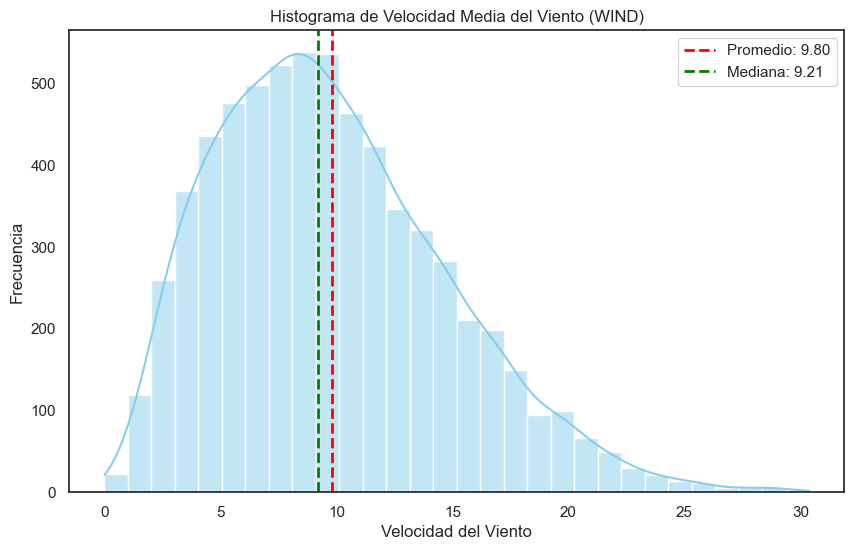

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar la columna de velocidad media del viento (WIND)
velocidad_viento = df["WIND"]

# Calcular estadísticas descriptivas
promedio = velocidad_viento.mean()
mediana = velocidad_viento.median()
desviacion = velocidad_viento.std()
cuartil_25 = velocidad_viento.quantile(0.25)
cuartil_75 = velocidad_viento.quantile(0.75)
rango_intercuartil = cuartil_75 - cuartil_25  # IQR = Q3 - Q1


# Opcional: Estadísticas descriptivas
print(velocidad_viento.describe())
print("Estadísticas descriptivas de la velocidad media del viento:")
print(f"Promedio: {promedio:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Rango intercuartil (IQR): {rango_intercuartil:.2f}")

# Crear una figura para el histograma
plt.figure(figsize=(10, 6))

# Histograma de la velocidad media del viento
sns.histplot(velocidad_viento, bins=30, color='skyblue', kde=True)

# Dibujar líneas verticales para promedio y mediana
plt.axvline(promedio, color='red', linestyle='--', linewidth=2, label=f'Promedio: {promedio:.2f}')
plt.axvline(mediana, color='green', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.2f}')

# Configuración del gráfico
plt.title('Histograma de Velocidad Media del Viento (WIND)')
plt.xlabel('Velocidad del Viento')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(False)

# Mostrar la figura
plt.show()


### T MIN - T MAX

Estadísticas descriptivas de T.MIN:
count    5900.000000
mean        6.411678
std         4.637243
min       -11.500000
25%         3.000000
50%         6.500000
75%        10.000000
max        18.000000
Name: T.MIN, dtype: float64

Estadísticas descriptivas de T.MAX:
count    5953.000000
mean       13.339123
std         4.890546
min        -0.100000
25%         9.600000
50%        13.300000
75%        17.200000
max        26.800000
Name: T.MAX, dtype: float64


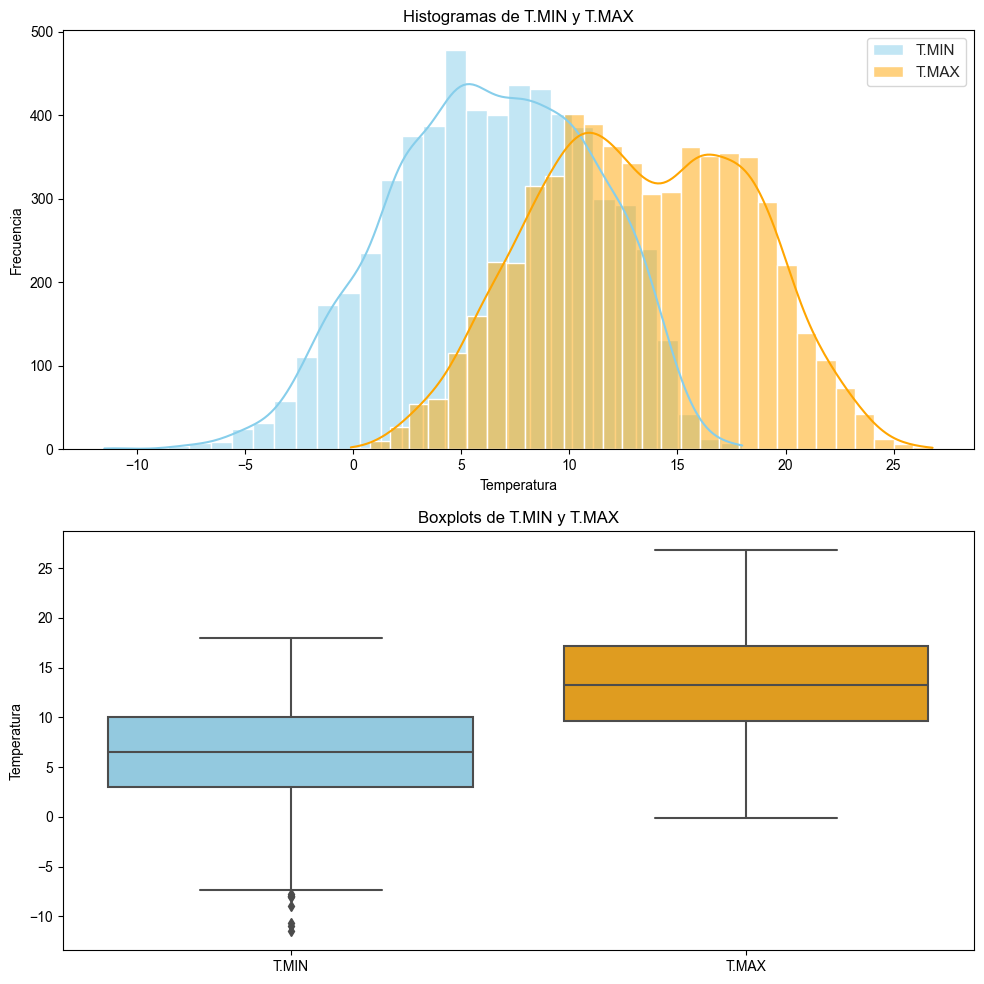

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MAX"]
data = df[columnas_interes]

# 1. Estadísticas descriptivas
print("Estadísticas descriptivas de T.MIN:")
print(data["T.MIN"].describe())

print("\nEstadísticas descriptivas de T.MAX:")
print(data["T.MAX"].describe())

# 2. Histogramas y boxplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))  # 2 filas, 1 columna

# Configurar el estilo de seaborn sin cuadrículas de fondo
sns.set(style="white")

# Histogramas (en el primer subplot)
sns.histplot(data["T.MIN"], bins=30, color='skyblue', kde=True, ax=axes[0], label='T.MIN')
sns.histplot(data["T.MAX"], bins=30, color='orange', kde=True, ax=axes[0], label='T.MAX')
axes[0].set_title('Histogramas de T.MIN y T.MAX')
axes[0].set_xlabel('Temperatura')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()

# Boxplots (en el segundo subplot)
sns.boxplot(data=data, palette=["skyblue", "orange"], ax=axes[1])
axes[1].set_title('Boxplots de T.MIN y T.MAX')
axes[1].set_ylabel('Temperatura')

# Eliminar las cuadrículas de fondo en ambos subplots
for ax in axes:
    ax.grid(False)

# Ajustar el espacio entre los subplots
plt.tight_layout()

# Mostrar la figura
plt.show()



Correlación de Pearson entre T.MIN y T.MAX: 0.79
Ecuación de la recta: y = 0.83x + 8.01


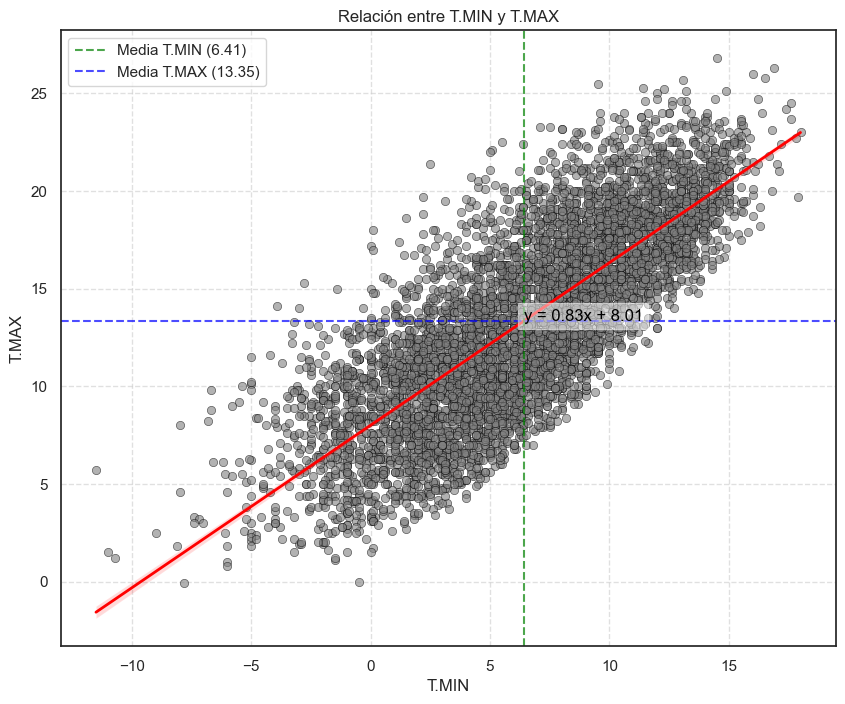

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés
columnas_interes = ["T.MIN", "T.MAX"]
data = df[columnas_interes]

# Eliminar valores NaN o infinitos para evitar errores en la regresión
data = data.replace([np.inf, -np.inf], np.nan).dropna()

# Calcular la correlación de Pearson
correlacion = data.corr(method='pearson').iloc[0, 1]
print(f"Correlación de Pearson entre T.MIN y T.MAX: {correlacion:.2f}")

# Calcular las medias de T.MIN y T.MAX
media_tmin = data["T.MIN"].mean()
media_tmax = data["T.MAX"].mean()

# Calcular la ecuación de la línea de tendencia (regresión lineal)
coeficientes = np.polyfit(data["T.MIN"], data["T.MAX"], 1)  # Ajuste lineal
pendiente, intercepto = coeficientes
print(f"Ecuación de la recta: y = {pendiente:.2f}x + {intercepto:.2f}")

# Crear el gráfico
plt.figure(figsize=(10, 8))

# Dibujar scatter plot en azul con bordes negros
sns.scatterplot(x="T.MIN", y="T.MAX", data=data, color='gray', edgecolor='black', alpha=0.6)

# Dibujar línea de tendencia en rojo
sns.regplot(x="T.MIN", y="T.MAX", data=data, scatter=False, color='red', line_kws={'linestyle': '-', 'linewidth': 2})

# Dibujar líneas punteadas indicando los valores medios
plt.axvline(x=media_tmin, color='green', linestyle='--', alpha=0.7, label=f'Media T.MIN ({media_tmin:.2f})')
plt.axhline(y=media_tmax, color='blue', linestyle='--', alpha=0.7, label=f'Media T.MAX ({media_tmax:.2f})')

# Etiquetas y título
plt.title('Relación entre T.MIN y T.MAX')
plt.xlabel('T.MIN')
plt.ylabel('T.MAX')

# Agregar ecuación en el gráfico
plt.text(media_tmin, media_tmax, f'y = {pendiente:.2f}x + {intercepto:.2f}', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

# Agregar leyenda
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar el gráfico
plt.show()


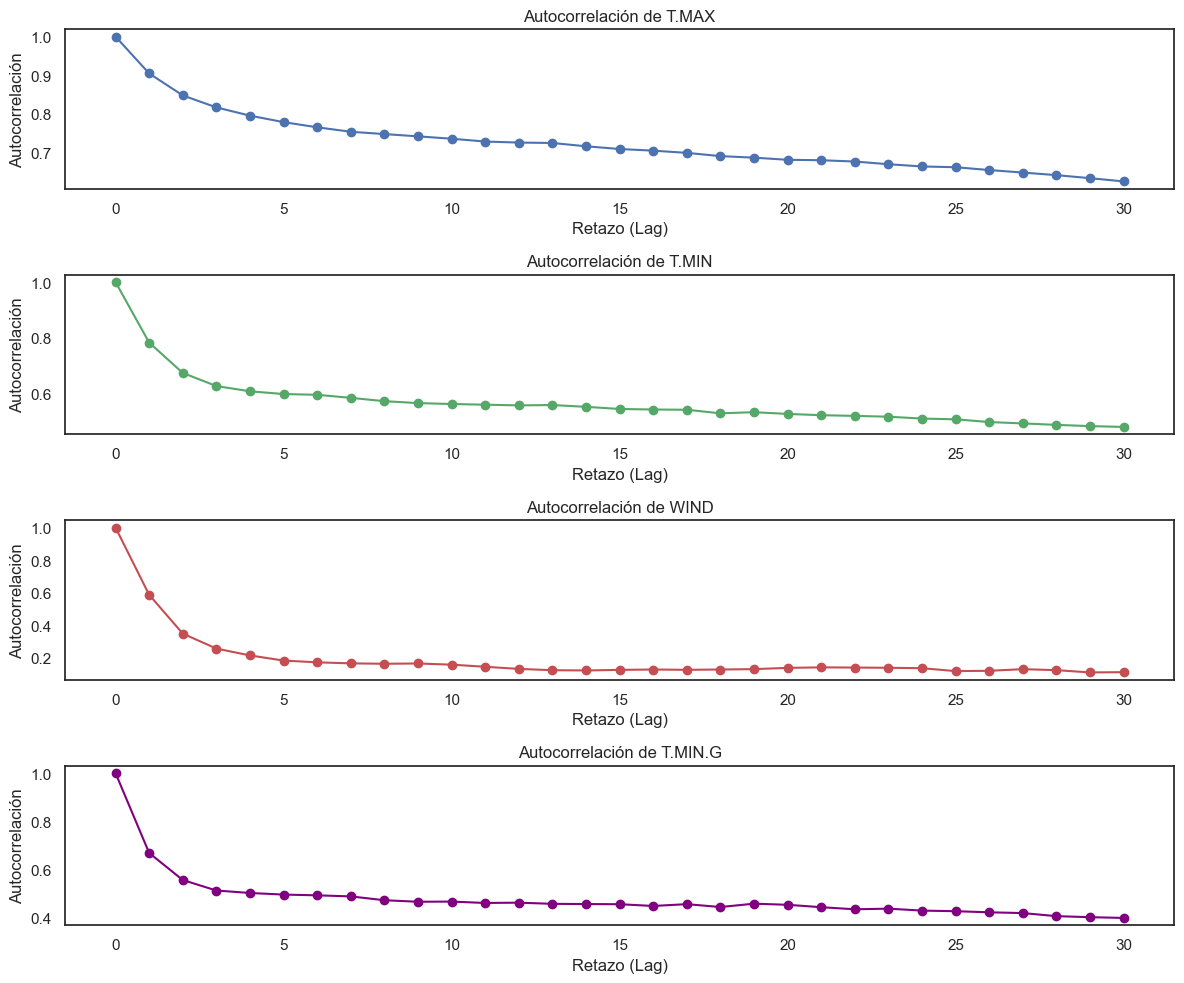

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
ruta = r"C:\Users\USUARIO WINDOWS\Desktop\wind_dataset (1).csv"
df = pd.read_csv(ruta)

# Seleccionar las columnas de interés (incluyendo T.MIN.G)
columnas_interes = ["T.MAX", "T.MIN", "WIND", "T.MIN.G"]
data = df[columnas_interes]

# Función para calcular la autocorrelación
def autocorrelacion(series, lag_max):
    return [series.autocorr(lag) for lag in range(lag_max + 1)]

# Establecer el número máximo de lags
lag_max = 30  # Puedes ajustarlo según el intervalo temporal de tu dataset

# Calcular la autocorrelación para cada variable
autocorr_tmax = autocorrelacion(data["T.MAX"], lag_max)
autocorr_tmin = autocorrelacion(data["T.MIN"], lag_max)
autocorr_wind = autocorrelacion(data["WIND"], lag_max)
autocorr_tming = autocorrelacion(data["T.MIN.G"], lag_max)

# Crear un gráfico de autocorrelación para cada variable
plt.figure(figsize=(12, 10))

# Graficar la autocorrelación para T.MAX
plt.subplot(4, 1, 1)
plt.plot(range(lag_max + 1), autocorr_tmax, marker='o', color='b')
plt.title('Autocorrelación de T.MAX')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para T.MIN
plt.subplot(4, 1, 2)
plt.plot(range(lag_max + 1), autocorr_tmin, marker='o', color='g')
plt.title('Autocorrelación de T.MIN')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para WIND
plt.subplot(4, 1, 3)
plt.plot(range(lag_max + 1), autocorr_wind, marker='o', color='r')
plt.title('Autocorrelación de WIND')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Graficar la autocorrelación para T.MIN.G
plt.subplot(4, 1, 4)
plt.plot(range(lag_max + 1), autocorr_tming, marker='o', color='purple')
plt.title('Autocorrelación de T.MIN.G')
plt.xlabel('Retazo (Lag)')
plt.ylabel('Autocorrelación')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()
